<a href="https://colab.research.google.com/github/AlexDiata/ITBA_3205_Eart-Benders/blob/main/Codes/LandSlideRisk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pan
import matplotlib.pyplot as plt

# **Data Cleaning of Landslide Dataset**
*Source:*[*NASA Global Landslide Catalog*](https://data.nasa.gov/Earth-Science/Global-Landslide-Catalog/h9d8-neg4)


*   This will provide the cleaned dataset for the recorded landslides that occur within the Philippines from 2010-2018.



In [177]:
#Dataframe
url = 'https://raw.githubusercontent.com/AlexDiata/ITBA_3205_Eart-Benders/main/DATASET/nasa_global_landslide_catalog_point.csv'
df = pan.read_csv(url)
#Removing landslide data from other countries beside Philippines
df = df.loc[df['country_name'] == 'Philippines']
#Dropping of columns that have irrelevant data
to_drop = ['OBJECTID','Shape','source_name','source_link', 
           'event_id','event_title','event_time','event_description','location_description',
           'event_import_id','latitude','longitude','gazetteer_closest_point', 
           'gazetteer_distance','submitted_date','last_edited_date','location_accuracy',
           'landslide_trigger', 'landslide_size','landslide_setting','fatality_count','injury_count',
           'storm_name', 'photo_link','comments','event_import_source',]
new_df = df.drop(to_drop, inplace=True, axis=1)
df.head(new_df)

,event_date,landslide_category,country_name,country_code,admin_division_name
35,2007-11-19 00:00:00,landslide,Philippines,PH,Surigao del Norte
39,2014-07-23 03:30:00,landslide,Philippines,PH,Rizal
45,2015-07-13 00:00:00,landslide,Philippines,PH,Benguet
55,2009-06-23 00:00:00,landslide,Philippines,PH,Misamis Oriental
66,2008-06-29 00:00:00,landslide,Philippines,PH,Cebu
...,...,...,...,...,...
35580,2012-02-16 00:00:00,landslide,Philippines,PH,Leyte
35606,2014-06-30 15:00:00,landslide,Philippines,PH,South Cotabato
35611,2010-10-18 00:00:00,landslide,Philippines,PH,Aurora
35633,2015-01-09 00:00:00,landslide,Philippines,PH,Surigao del Sur


In [178]:
#Dropping of data that happend before 2010 and after 2018
df["event_date"] = pan.to_datetime(df["event_date"])
df['event_date'] = pan.to_datetime(df['event_date'],format='%Y%m%d')
df['event_date'] = pan.DatetimeIndex(df['event_date']).year
df.drop(df[df['event_date'] < 2010].index, inplace=True)
df.drop(df[df['event_date'] > 2018].index, inplace=True)
df.head(new_df)

,event_date,landslide_category,country_name,country_code,admin_division_name
39,2014,landslide,Philippines,PH,Rizal
45,2015,landslide,Philippines,PH,Benguet
89,2010,landslide,Philippines,PH,Cebu
95,2014,landslide,Philippines,PH,Maguindanao
111,2012,landslide,Philippines,PH,Camarines Sur
...,...,...,...,...,...
34981,2018,landslide,Philippines,PH,Eastern Samar
35580,2012,landslide,Philippines,PH,Leyte
35606,2014,landslide,Philippines,PH,South Cotabato
35611,2010,landslide,Philippines,PH,Aurora


In [179]:
#Further dropping of irrelevant data
to_drop = ['landslide_category','country_name','country_code',]
new_df = df.drop(to_drop, inplace=True, axis=1)
df.head(new_df)

,event_date,admin_division_name
39,2014,Rizal
45,2015,Benguet
89,2010,Cebu
95,2014,Maguindanao
111,2012,Camarines Sur
...,...,...
34981,2018,Eastern Samar
35580,2012,Leyte
35606,2014,South Cotabato
35611,2010,Aurora


# **Landslide Dataset**


*   This provides the dataset for the recorded landslide that happened in all the provinces in the Philippines from 2010-2018.



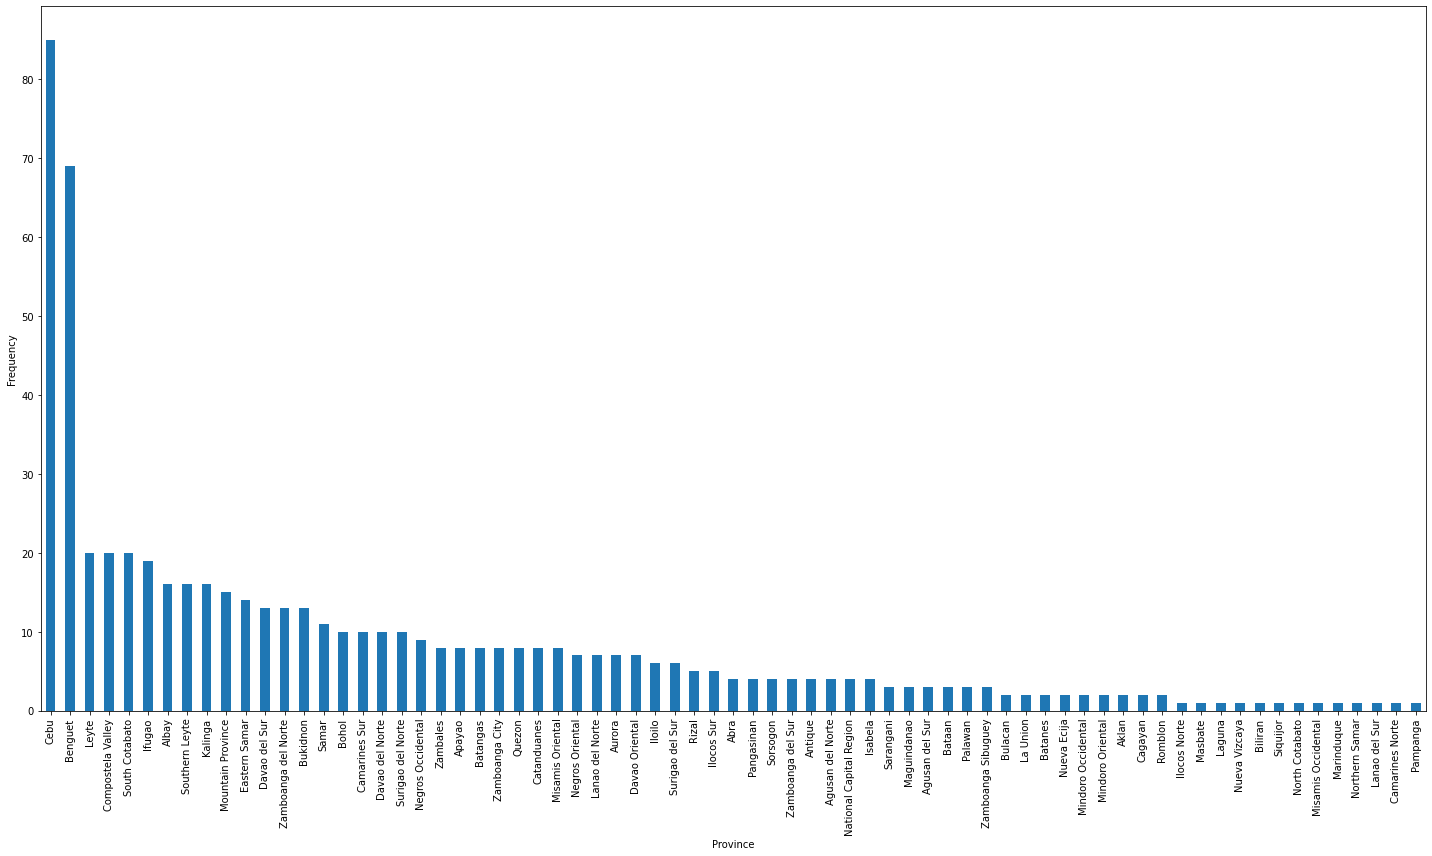

In [180]:
plt.rcParams["figure.figsize"] = [20, 12]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
df['admin_division_name'].value_counts().plot(ax=ax, kind='bar', xlabel='Province', ylabel='Frequency')

plt.show()